# ROUND 2

## Show the dataframe shape.

In [39]:
import pandas as pd

marketing_customer_data = pd.read_csv('csv_files/marketing_customer_analysis.csv')
marketing_customer_data.shape

(10910, 26)

## Standardize header names.

In [40]:
print(list(marketing_customer_data.columns))
columns_definition = { 'EmploymentStatus':'Employment Status' }
marketing_customer_data = marketing_customer_data.rename(columns = columns_definition)
print(list(marketing_customer_data.columns))

['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage', 'Education', 'Effective To Date', 'EmploymentStatus', 'Gender', 'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size', 'Vehicle Type']
['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage', 'Education', 'Effective To Date', 'Employment Status', 'Gender', 'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size', 'Vehicle Type']


## Which columns are numerical?

In [41]:
numerical_columns = marketing_customer_data._get_numeric_data().columns
list(numerical_columns)

['Unnamed: 0',
 'Customer Lifetime Value',
 'Income',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Total Claim Amount']

## Which columns are categorical?

In [42]:
list(set(marketing_customer_data.columns) - set(numerical_columns))

['Vehicle Size',
 'Sales Channel',
 'Response',
 'Policy',
 'Coverage',
 'Gender',
 'Effective To Date',
 'Location Code',
 'State',
 'Employment Status',
 'Renew Offer Type',
 'Vehicle Class',
 'Education',
 'Marital Status',
 'Customer',
 'Vehicle Type',
 'Policy Type']

## Check and deal with NaN values.

In [43]:
marketing_customer_data.isna().sum()

Unnamed: 0                          0
Customer                            0
State                             631
Customer Lifetime Value             0
Response                          631
Coverage                            0
Education                           0
Effective To Date                   0
Employment Status                   0
Gender                              0
Income                              0
Location Code                       0
Marital Status                      0
Monthly Premium Auto                0
Months Since Last Claim           633
Months Since Policy Inception       0
Number of Open Complaints         633
Number of Policies                  0
Policy Type                         0
Policy                              0
Renew Offer Type                    0
Sales Channel                       0
Total Claim Amount                  0
Vehicle Class                     622
Vehicle Size                      622
Vehicle Type                     5482
dtype: int64

In [44]:
marketing_customer_data.dtypes

Unnamed: 0                         int64
Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
Employment Status                 object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim          float64
Months Since Policy Inception      int64
Number of Open Complaints        float64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size    

In [45]:
month_since_last_claim_median = marketing_customer_data['Months Since Last Claim'].median()
marketing_customer_data['Months Since Last Claim'] = marketing_customer_data['Months Since Last Claim'].fillna(month_since_last_claim_median)
number_open_complaints_median = marketing_customer_data['Number of Open Complaints'].median()
marketing_customer_data['Number of Open Complaints'] = marketing_customer_data['Number of Open Complaints'].fillna(number_open_complaints_median)
marketing_customer_data.isna().sum()

Unnamed: 0                          0
Customer                            0
State                             631
Customer Lifetime Value             0
Response                          631
Coverage                            0
Education                           0
Effective To Date                   0
Employment Status                   0
Gender                              0
Income                              0
Location Code                       0
Marital Status                      0
Monthly Premium Auto                0
Months Since Last Claim             0
Months Since Policy Inception       0
Number of Open Complaints           0
Number of Policies                  0
Policy Type                         0
Policy                              0
Renew Offer Type                    0
Sales Channel                       0
Total Claim Amount                  0
Vehicle Class                     622
Vehicle Size                      622
Vehicle Type                     5482
dtype: int64

In [46]:
description = marketing_customer_data.describe(include='all').T['50%']['Income']

In [47]:
#marketing_customer_data.describe()['Number of Open Complaints']
state_more_occurrences = marketing_customer_data['State'].value_counts(dropna=False)[0]
marketing_customer_data['State'] = marketing_customer_data['State'].fillna(state_more_occurrences)

In [48]:
response_more_occurences = marketing_customer_data['Response'].value_counts(dropna=False)[0]
marketing_customer_data['Response'] = marketing_customer_data['Response'].fillna(response_more_occurences)

In [49]:
class_more_occurences = marketing_customer_data['Vehicle Class'].value_counts(dropna=False)[0]
marketing_customer_data['Vehicle Class'] = marketing_customer_data['Vehicle Class'].fillna(class_more_occurences)

In [50]:
size_more_occurrences = marketing_customer_data['Vehicle Size'].value_counts(dropna=False)[0]
marketing_customer_data['Vehicle Size'] = marketing_customer_data['Vehicle Size'].fillna(size_more_occurrences)

In [51]:
type_more_occurrences = marketing_customer_data['Vehicle Type'].value_counts(dropna=False)[0]
marketing_customer_data['Vehicle Type'] = marketing_customer_data['Vehicle Type'].fillna(type_more_occurrences)

In [52]:
marketing_customer_data.isna().sum()

Unnamed: 0                       0
Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
Employment Status                0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
Vehicle Type                     0
dtype: int64

## Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.

In [53]:
#file['date_time'] = pd.to_datetime(file['date_time'], errors='coerce')
marketing_customer_data['Effective To Date'] = pd.to_datetime(marketing_customer_data['Effective To Date'], errors='coerce')
marketing_customer_data['Month'] = pd.DatetimeIndex(marketing_customer_data['Effective To Date']).month

In [54]:
marketing_customer_data[marketing_customer_data['Month'].isin([1, 2, 3])]

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,Employment Status,Gender,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type,Month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,5482,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,5482,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,5482,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,5482,2
10908,10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


## BONUS: Put all the previously mentioned data transformations into a function.

# ROUND 3

## Show DataFrame info.

In [55]:
marketing_customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Unnamed: 0                     10910 non-null  int64         
 1   Customer                       10910 non-null  object        
 2   State                          10910 non-null  object        
 3   Customer Lifetime Value        10910 non-null  float64       
 4   Response                       10910 non-null  object        
 5   Coverage                       10910 non-null  object        
 6   Education                      10910 non-null  object        
 7   Effective To Date              10910 non-null  datetime64[ns]
 8   Employment Status              10910 non-null  object        
 9   Gender                         10910 non-null  object        
 10  Income                         10910 non-null  int64         
 11  Location Code  

## Describe DataFrame.

In [56]:
marketing_customer_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,10910.0,5454.500000,3149.590053,0.000000,2727.250000,5454.500000,8181.750000,10909.000000
Customer Lifetime Value,10910.0,8018.241094,6885.081434,1898.007675,4014.453113,5771.147235,8992.779137,83325.381190
Income,10910.0,37536.284785,30359.195670,0.000000,0.000000,33813.500000,62250.750000,99981.000000
Monthly Premium Auto,10910.0,93.196059,34.442532,61.000000,68.000000,83.000000,109.000000,298.000000
Months Since Last Claim,10910.0,15.082401,9.787208,0.000000,7.000000,14.000000,23.000000,35.000000
Months Since Policy Inception,10910.0,48.091934,27.940675,0.000000,24.000000,48.000000,71.000000,99.000000
Number of Open Complaints,10910.0,0.361962,0.890134,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,10910.0,2.979193,2.399359,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,10910.0,434.888330,292.180556,0.099007,271.082527,382.564630,547.200000,2893.239678
Month,10910.0,1.466728,0.498915,1.000000,1.000000,1.000000,2.000000,2.000000


## Show a plot of the total number of responses.

<AxesSubplot:>

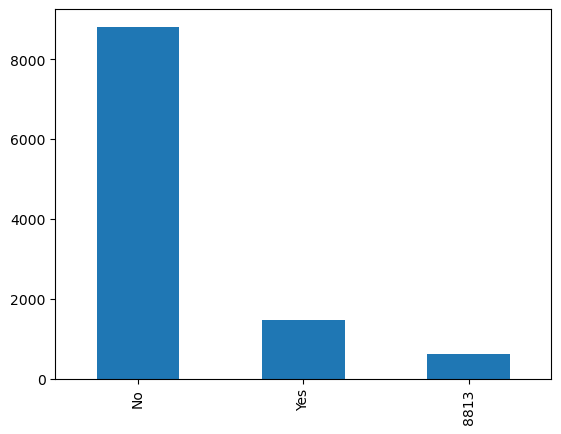

In [57]:
marketing_customer_data['Response'].value_counts()[:].plot(kind='bar')

## Show a plot of the response rate by the sales channel.

In [58]:
marketing_customer_data['Response'].value_counts()

No      8813
Yes     1466
8813     631
Name: Response, dtype: int64

In [59]:
marketing_customer_data['Sales Channel'].value_counts()

Agent          4121
Branch         3022
Call Center    2141
Web            1626
Name: Sales Channel, dtype: int64

In [60]:
list(marketing_customer_data['Response'].unique())

['No', 'Yes', 8813]

In [61]:
sales_channels = list(marketing_customer_data['Sales Channel'].unique())
sales_channels

['Agent', 'Call Center', 'Branch', 'Web']

In [62]:
marketing_customer_data['Responded'] = marketing_customer_data['Response'].isin(['Yes', 8813])
marketing_customer_data

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,Employment Status,Gender,...,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type,Month,Responded
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,5482,2,False
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,5482,1,False
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2,False
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1,True
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,5482,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,...,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1,False
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1,False
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,5482,2,False
10908,10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,...,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2,False


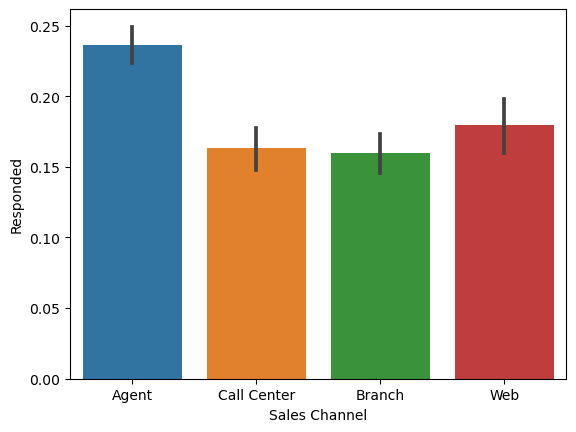

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x="Sales Channel", y="Responded", data=marketing_customer_data)
plt.show()

## Show a plot of the response rate by the total claim amount.

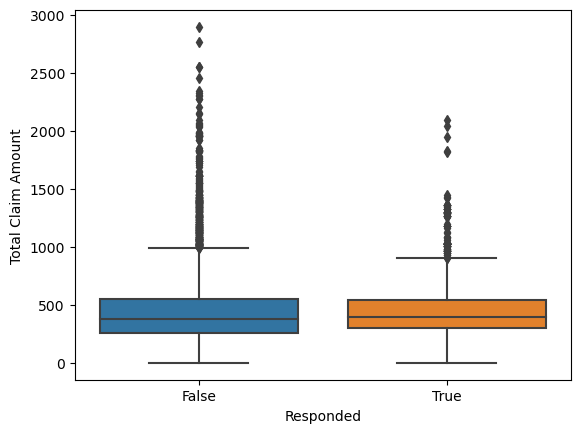

In [64]:
sns.boxplot(x = 'Responded',y='Total Claim Amount', data=marketing_customer_data)
plt.show()

## Show a plot of the response rate by income.

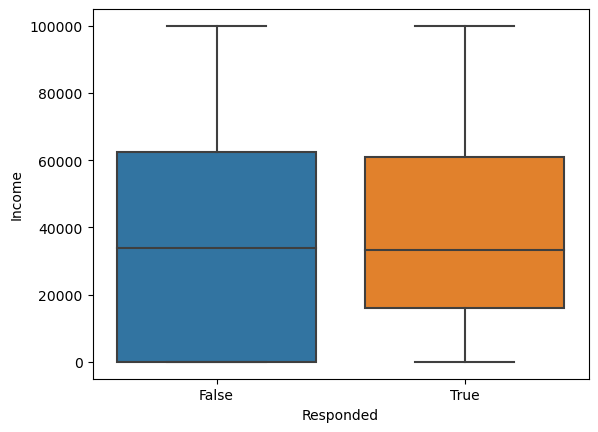

In [65]:
sns.boxplot(x = 'Responded',y='Income', data=marketing_customer_data)
plt.show()

# Round 4

## Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [66]:
import numpy as np

numerical = marketing_customer_data.select_dtypes(np.number)
numerical

,Unnamed: 0,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Month
0,0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,2
1,1,2228.525238,0,64,3.0,26,0.0,1,744.924331,1
2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,2
3,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411,1
4,4,9025.067525,23675,117,14.0,31,0.0,7,707.925645,1
...,...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,14.0,40,0.0,7,1214.400000,1
10906,10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929,1
10907,10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996,2
10908,10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849,2


In [67]:
categorical = marketing_customer_data.select_dtypes(object)
categorical

,Customer,State,Response,Coverage,Education,Employment Status,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,5482
1,KX64629,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,5482
2,LZ68649,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,5482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,5482
10908,WA60547,California,No,Premium,College,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


## Now we will try to check the normality of the numerical variables visually

## Use seaborn library to construct distribution plots for the numerical variables

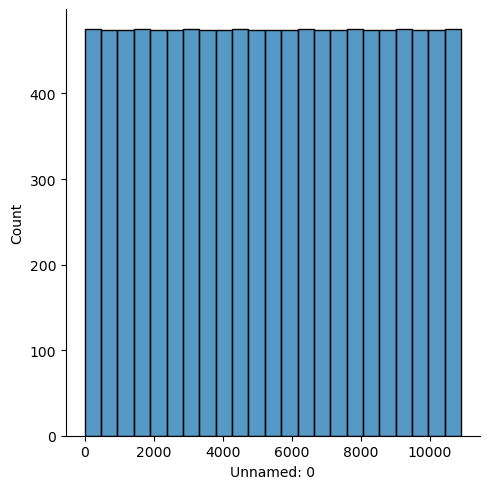

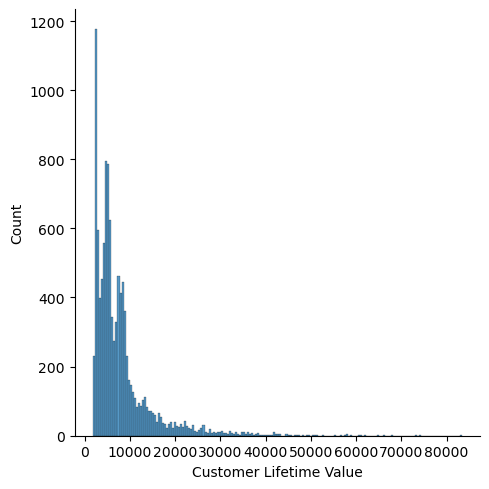

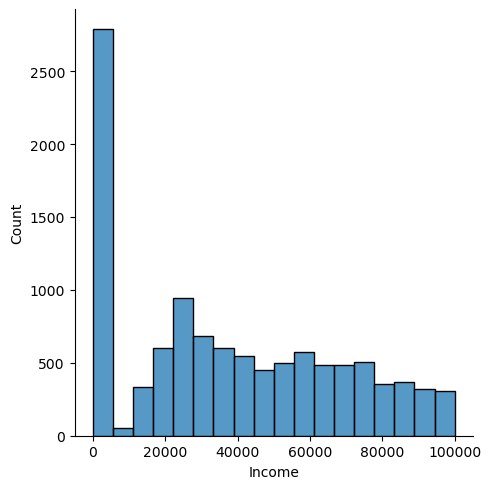

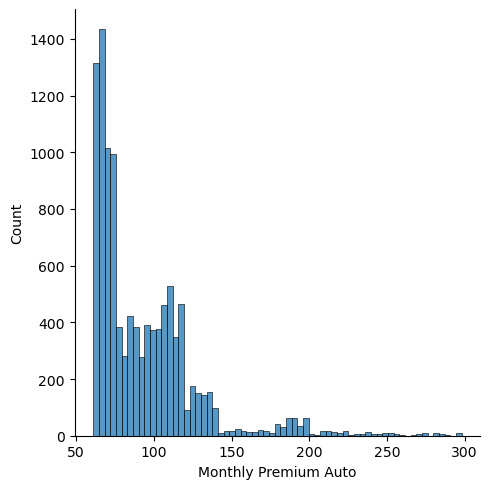

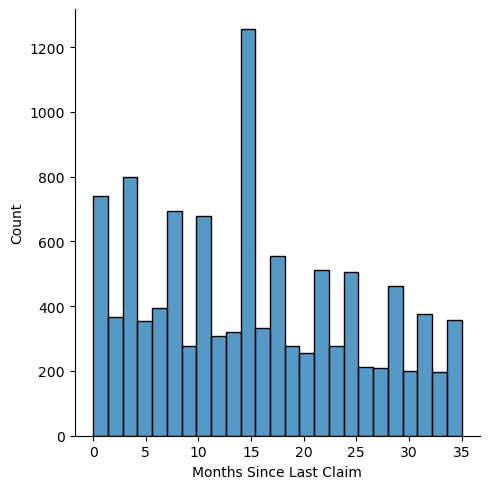

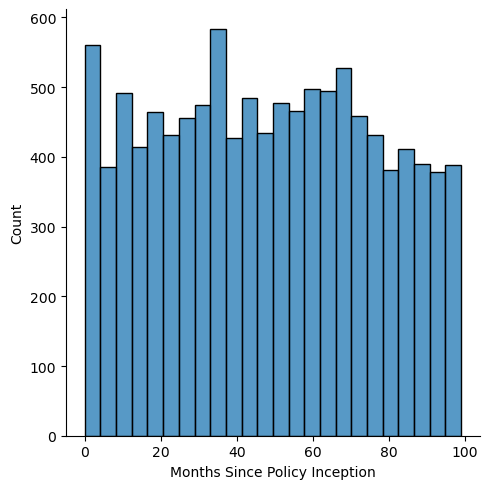

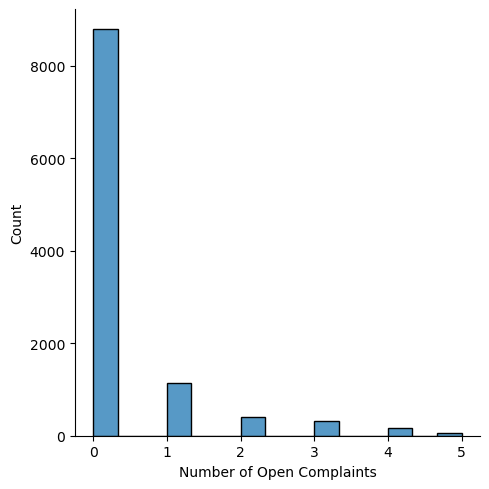

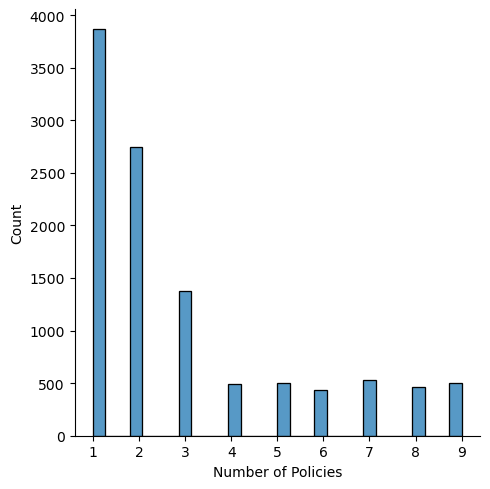

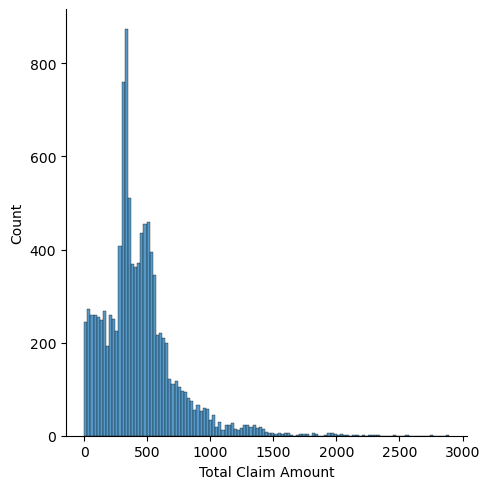

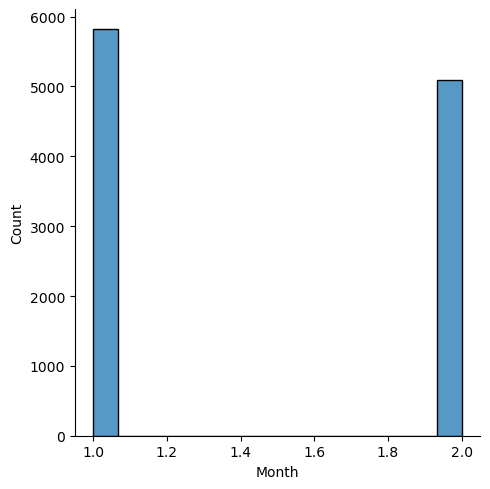

In [68]:
#numerical = numerical.drop(['Unnamed: 0', 'Month'], axis=1)
for x in numerical:
        sns.displot(numerical[x])
        plt.show()

## Use Matplotlib to construct histograms

Unnamed: 0


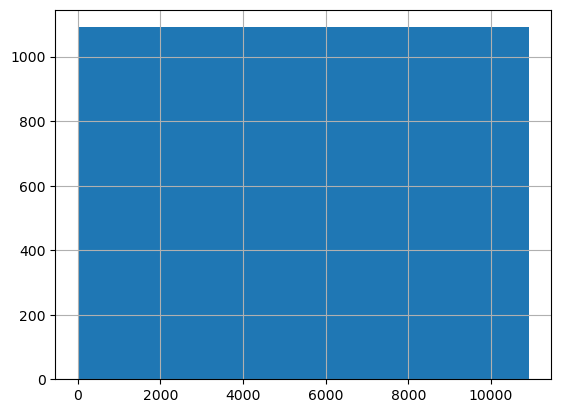

Customer Lifetime Value


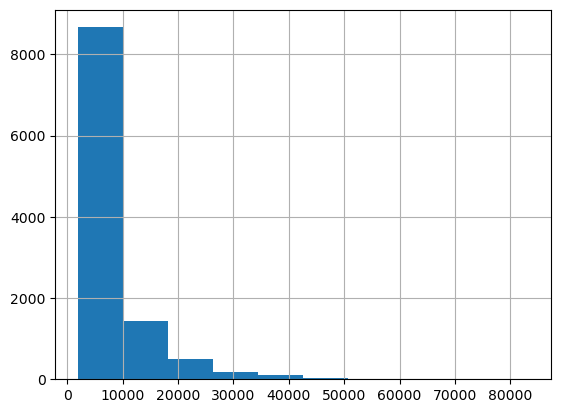

Income


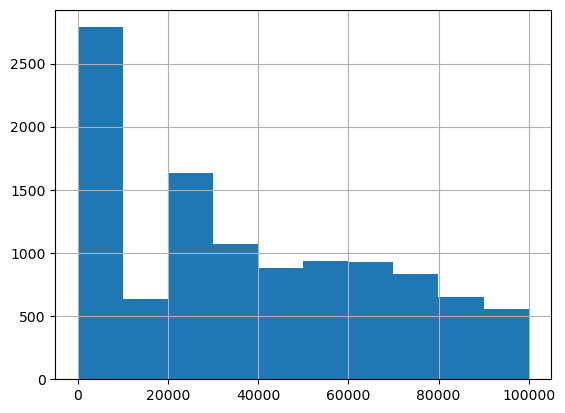

Monthly Premium Auto


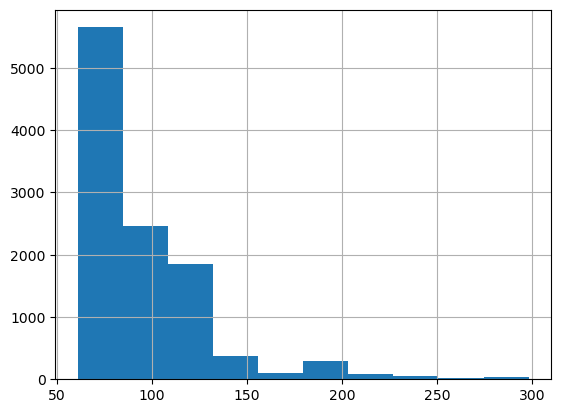

Months Since Last Claim


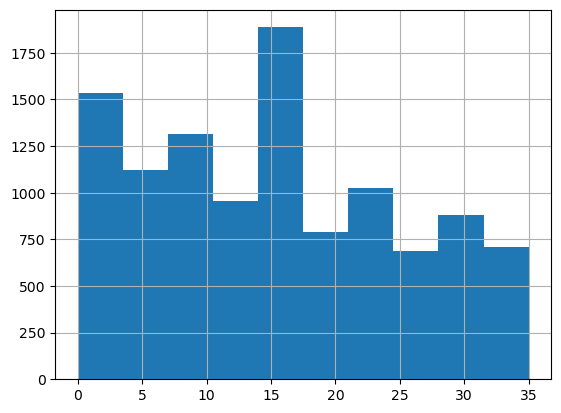

Months Since Policy Inception


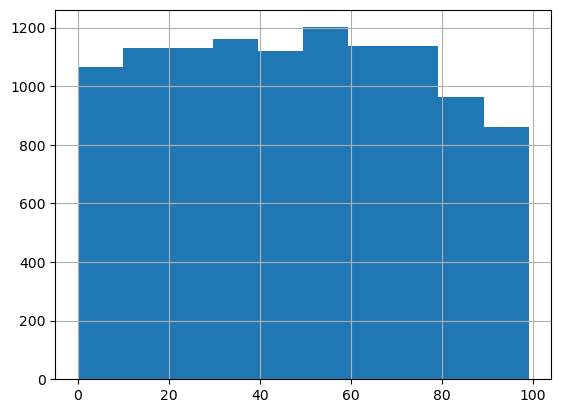

Number of Open Complaints


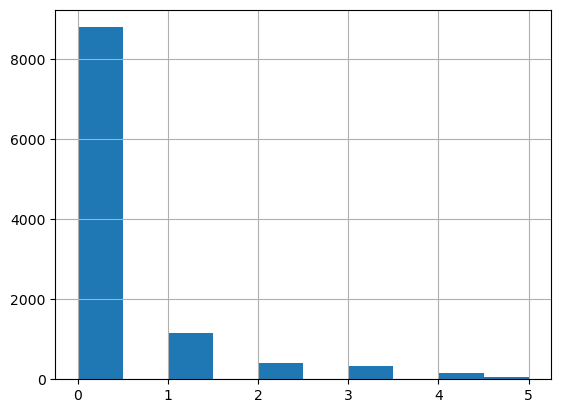

Number of Policies


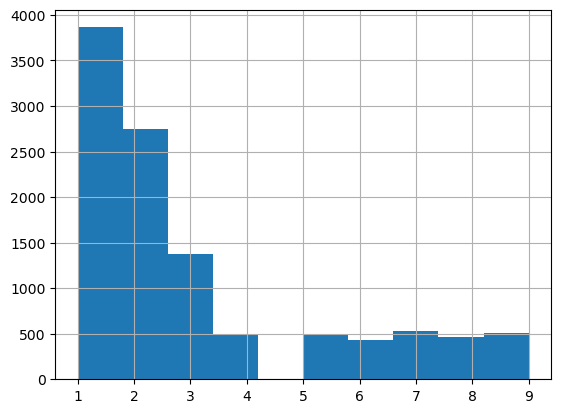

Total Claim Amount


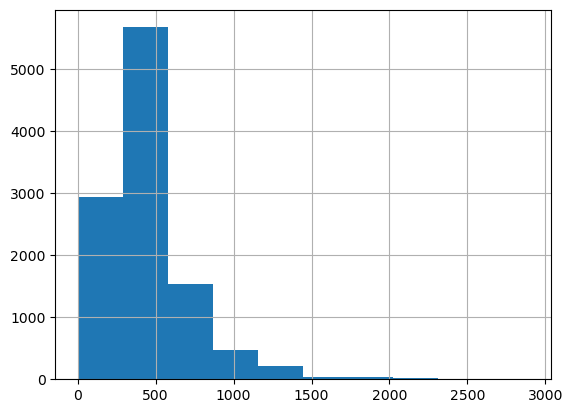

Month


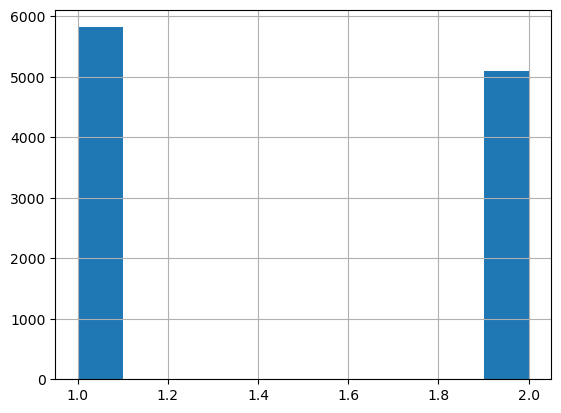

In [69]:
for x in numerical:
        print(x)
        numerical[x].hist()
        plt.show()

## Do the distributions for different numerical variables look like a normal distribution

They don't. We cannot see a symmetric pattern

## For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

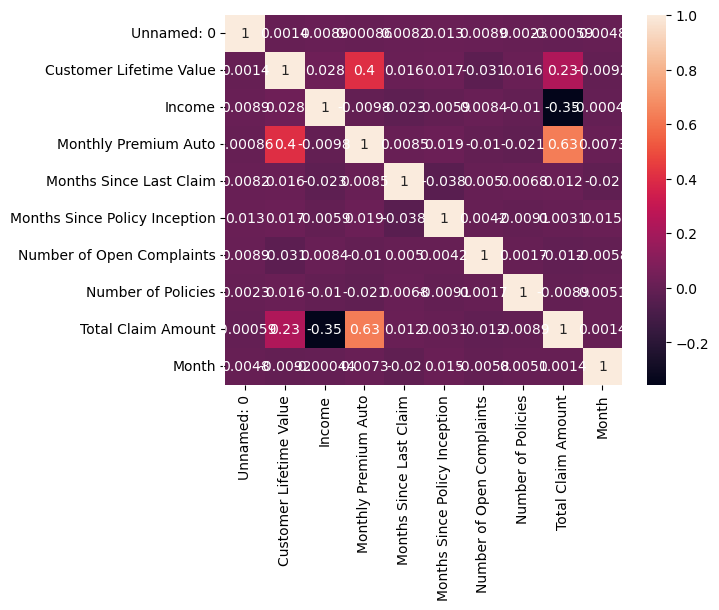

In [70]:
correlations_matrix = numerical.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

## Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

Nothing to drop as it seems there is no strong correlation.

# ROUND 5

## X-y split.

In [71]:
numerical

,Unnamed: 0,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Month
0,0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,2
1,1,2228.525238,0,64,3.0,26,0.0,1,744.924331,1
2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,2
3,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411,1
4,4,9025.067525,23675,117,14.0,31,0.0,7,707.925645,1
...,...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,14.0,40,0.0,7,1214.400000,1
10906,10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929,1
10907,10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996,2
10908,10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849,2


In [72]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

y = numerical['Total Claim Amount']
X = numerical.drop(['Total Claim Amount'], axis=1)

## Normalize (numerical).

In [73]:
lm = linear_model.LinearRegression()
lm.fit(X,y)
print(lm.score(X,y))
y_pred=lm.predict(X)
print(mean_squared_error(y_pred,y))

0.5205399336782754
40927.50352147804


Probably not needed but just to check...

In [74]:
iqr = np.percentile(numerical['Total Claim Amount'],75) - np.percentile(numerical['Total Claim Amount'],25)
upper_limit = np.percentile(numerical['Total Claim Amount'],75) + 1.5*iqr
lower_limit = np.percentile(numerical['Total Claim Amount'],25) - 1.5*iqr

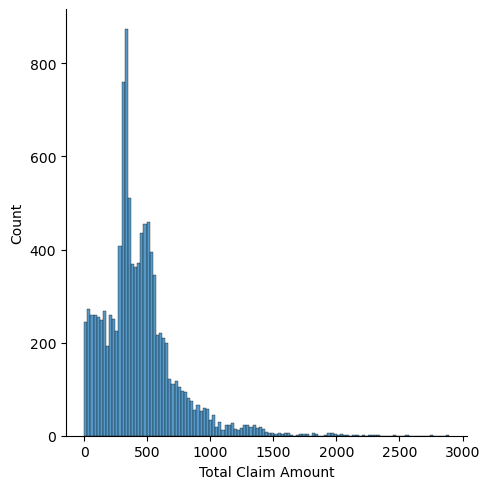

In [75]:
numerical1 = numerical[(numerical['Total Claim Amount']>lower_limit) & (numerical['Total Claim Amount']<upper_limit)].copy()
sns.displot(numerical['Total Claim Amount'])
plt.show()